In [167]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
import seaborn as sns

In [168]:
df_raw = pd.read_pickle('USGS_raw_data.pickle')
df = df_raw.dropna(axis=1, thresh=365*5)
df.describe()

,02111500,03086000,03110685,03110690,03111515,03111520,03112500,03114275,03114280,03150700,...,07289000,07331600,07335500,07337000,07344370,07374000,07374525,08266820,07020850,turbidity
count,2190.000000,2192.000000,2176.000000,2150.000000,2183.000000,2168.000000,2149.000000,2174.000000,2173.000000,2183.000000,...,2.191000e+03,2192.000000,2192.000000,2175.000000,2192.000000,2.173000e+03,2.145000e+03,2190.000000,2162.000000,2133.000000
mean,151.140228,34991.245438,12.570827,15.246465,12.745318,15.517721,17.648641,12.877898,14.179991,17.661947,...,6.657170e+05,4781.018431,8989.775091,13088.583908,23500.898723,5.349627e+05,5.259905e+05,67.024338,20.124968,58.842733
std,156.542523,26976.851624,0.387422,2.678622,0.231245,3.100420,2.238204,0.176629,2.324297,2.608087,...,3.301025e+05,10066.992521,19981.561141,25261.199708,31761.111611,2.566121e+05,2.422678e+05,50.502049,8.743033,35.005728
min,38.400000,4040.000000,11.850000,12.410000,12.080000,12.220000,15.420000,12.140000,11.710000,15.030000,...,1.910000e+05,11.400000,177.000000,443.000000,1150.000000,1.410000e+05,7.170000e+04,22.700000,4.860000,6.800000
25%,77.825000,14300.000000,12.240000,13.320000,12.590000,13.230000,16.210000,12.760000,12.670000,15.980000,...,4.010000e+05,160.000000,778.750000,1825.000000,3845.000000,3.200000e+05,3.280000e+05,39.700000,13.510000,30.000000
50%,112.000000,27000.000000,12.430000,14.180000,12.750000,14.350000,16.730000,12.900000,13.230000,16.630000,...,6.070000e+05,783.000000,2100.000000,4270.000000,10200.000000,5.050000e+05,4.910000e+05,48.600000,19.175000,52.900000
75%,167.000000,48025.000000,12.920000,16.307500,12.900000,16.762500,18.200000,13.010000,14.830000,18.365000,...,8.810000e+05,4022.500000,6890.000000,11700.000000,28200.000000,7.070000e+05,7.070000e+05,69.675000,25.507500,80.300000
max,2300.000000,152000.000000,13.620000,28.790000,13.400000,31.850000,30.950000,13.320000,28.360000,34.010000,...,1.900000e+06,70200.000000,223000.000000,254000.000000,206000.000000,1.330000e+06,1.330000e+06,319.000000,48.770000,208.500000


In [191]:
def plotfit(X,y,lr):
#     gs = gridspec.GridSpec(6, 4)
    
#     ax2 = plt.subplot(gs[2:, :2])
#     plt.scatter(lr.predict(X),y,alpha=0.5,color='black')
#     ax2.set_xlabel('measured log(turbidity)')
#     ax2.set_ylabel('predicted log(turbidity)')
#     ax2.set_title('Measured vs. Predicted',fontweight='bold')
    
#     ax1 = plt.subplot(gs[:2, :])
#     plt.plot(pd.Series(lr.predict(X),index=y.index),'.')
#     plt.plot(y,'.',ax=ax1)
#     ax1.set_xlabel('year')
#     ax1.set_ylabel('log(turbidity)')
#     ax1.legend(['measured','predicted'])
#     ax1.set_title('Time Series Plot',fontweight='bold')
    
#     ax3 = plt.subplot(gs[2:, 2:4])
#     ax3.set_title('Residual Histogram',fontweight='bold')
#     ax3.set_xlabel('residual')
#     ax3.set_ylabel('count')
#     plt.hist(lr.predict(X)-y,bins=20);
    
    plt.subplots(figsize=(10,10))
    ax = plt.subplot(2,2,3)
    plt.scatter(lr.predict(X),y,alpha=0.3,color='black')
    ax.set_xlabel('measured log(turbidity)')
    ax.set_ylabel('predicted log(turbidity)')
    ax.set_title('Measured vs. Predicted',fontweight='bold')
    ax = plt.subplot(2,1,1)
    plt.plot(pd.Series(lr.predict(X),index=y.index),'.')
    plt.plot(y,'.')
    ax.set_xlabel('year')
    ax.set_ylabel('log(turbidity)')
    ax.legend(['measured','predicted'])
    ax.set_title('Time Series Plot',fontweight='bold')
    ax = plt.subplot(2,2,4)
    ax.set_title('Residual Histogram',fontweight='bold')
    ax.set_xlabel('residual')
    ax.set_ylabel('count')
    plt.hist(lr.predict(X)-y,bins=20,color='#999999');

0.795497681407


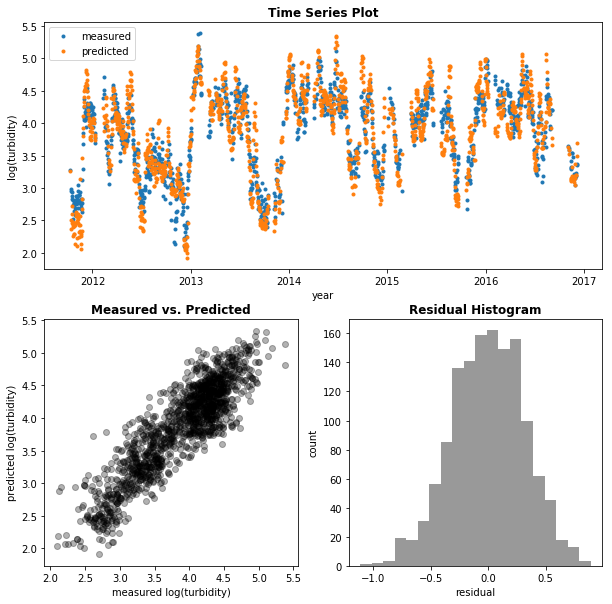

In [326]:
# apply log transformation to all variables
lr = LinearRegression()
data = df.dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)
X = data.drop(['turbidity'],axis=1)
y = data['turbidity']
lr.fit(X,y)
print(lr.score(X,y))
plotfit(X,y,lr)

In [239]:
X = sm.add_constant(X)
# Create your model and
# Fit your model to your training set
smfit = sm.OLS(y,X).fit()
smfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              turbidity   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     42.86
Date:                Wed, 31 Jan 2018   Prob (F-statistic):               0.00
Time:                        10:00:37   Log-Likelihood:                -366.35
No. Observations:                1359   AIC:                             960.7
Df Residuals:                    1245   BIC:                             1555.
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.4827      4.626     -8.102      0.000     -46.558     -28.407
02111500       0.0306      0.026      1.196      0.232      -0.020       0.081
03086000       0.0403      0.070      0.575      0.565      -0.097       0.178
03110685       0.4124      0.582      0.709      0.478      -0.729       1.553
03110690       0.8278      1.211      0.683      0.495      -1.549       3.204
03111515      -0.4009      1.166     -0.344      0.731      -2.689       1.887
03111520      -1.2142      1.258     -0.965      0.335      -3.683       1.255
03112500      -0.4267      1.101     -0.388      0.698      -2.587       1.733
03114275       0.1004      1.301      0.077      0.938      -2.451       2.652
03114280       0.6054      0.585      1.035      0.301      -0.542       1.753
03150700      -0.1329      0.451     -0.294      0.769      -1.018       0.753
03277200      -0.0652      0.050     -1.296      0.195      -0.164       0.033
03283500      -0.0857      0.019     -4.459      0.000      -0.123      -0.048
03294600       0.1853      0.098      1.890      0.059      -0.007       0.378
03303280       0.0735      0.054      1.357      0.175      -0.033       0.180
03381700      -0.2019      0.041     -4.950      0.000      -0.282      -0.122
03404000       0.0074      0.079      0.094      0.925      -0.147       0.162
03404500      -0.0027      0.082     -0.033      0.973      -0.164       0.158
03430250       1.4047      0.671      2.093      0.037       0.088       2.721
03430320      -0.6054      4.962     -0.122      0.903     -10.341       9.130
03431091      -3.8455      6.294     -0.611      0.541     -16.194       8.503
03431500      -0.0911      0.076     -1.201      0.230      -0.240       0.058
03431712       3.8865      1.823      2.132      0.033       0.311       7.462
03436100       0.0792      0.020      3.881      0.000       0.039       0.119
03594500       1.8044      0.519      3.476      0.001       0.786       2.823
04077630       0.0406      0.055      0.738      0.461      -0.067       0.149
04112500       0.0986      0.026      3.795      0.000       0.048       0.150
04126740      -0.0581      0.098     -0.592      0.554      -0.250       0.134
05051500      -0.1299      0.063     -2.047      0.041      -0.254      -0.005
05051522       0.3787      0.109      3.472      0.001       0.165       0.593
05054000      -0.3671      0.095     -3.865      0.000      -0.553      -0.181
05064500       0.4656      0.091      5.128      0.000       0.287       0.644
05079000      -0.0634      0.094     -0.674      0.501      -0.248       0.121
05080000       0.0864      0.104      0.830      0.406      -0.118       0.290
05082500      -0.5131      0.124     -4.139      0.000      -0.756      -0.270
05092000       0.3318      0.112      2.965      0.003       0.112       0.551
05

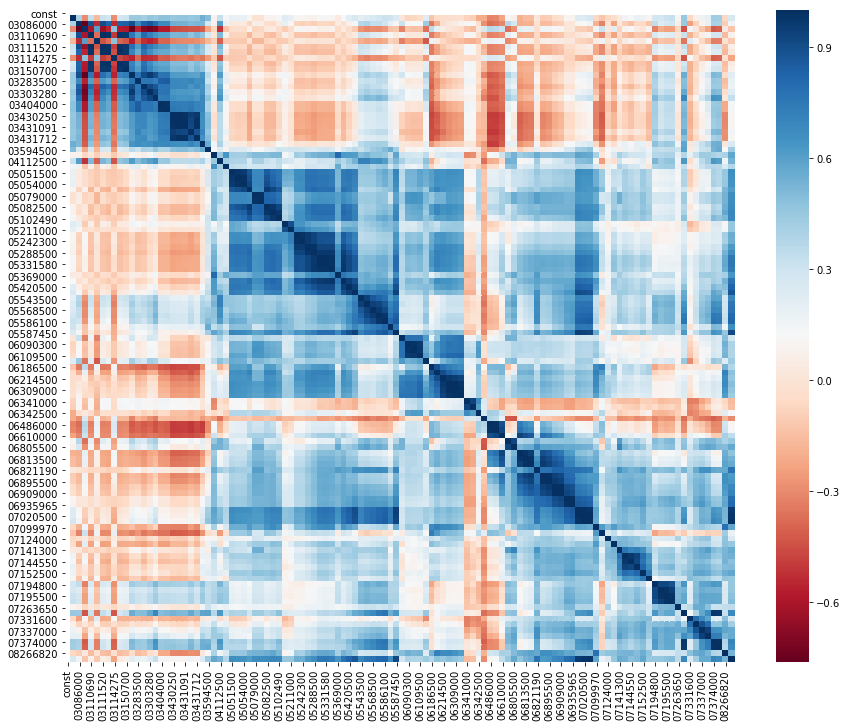

In [240]:
plt.figure(figsize=(15,12))
sns.heatmap(X.corr(),cmap='RdBu')

0.730879535145


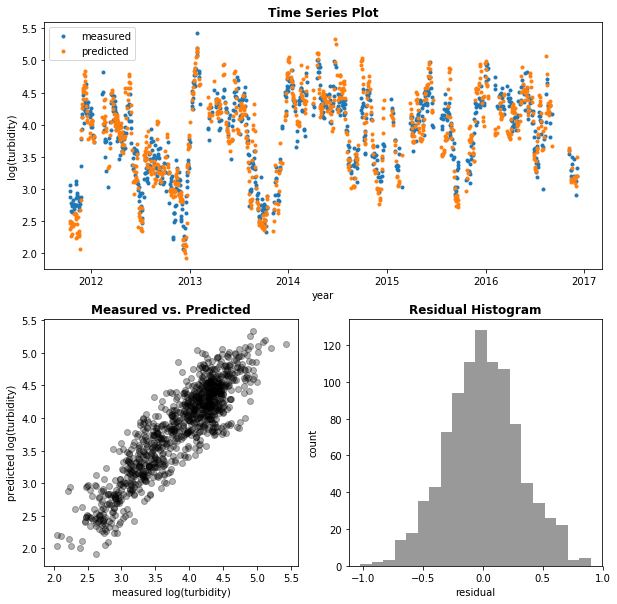

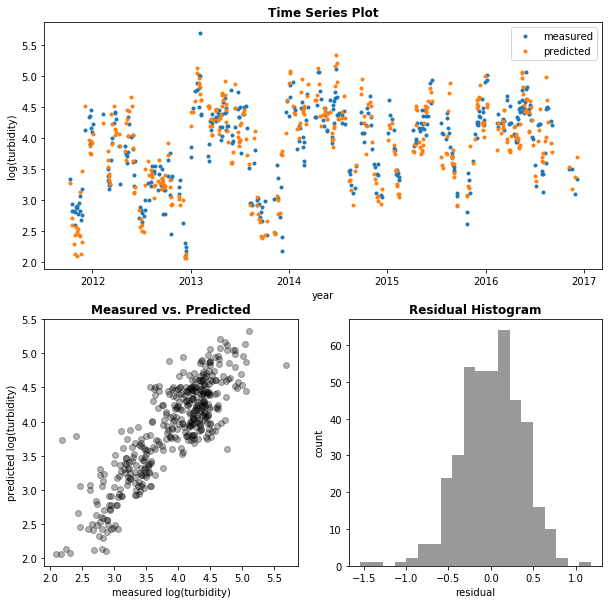

In [317]:
# apply train-test split
lr = LinearRegression()
data = df.dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)

X = data.drop(['turbidity'],axis=1)
y = data['turbidity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
plotfit(X_train,y_train,lr)
plotfit(X_test,y_test,lr)

In [318]:
# apply K-fold cross validation
from sklearn.cross_validation import cross_val_score

lr = LinearRegression()
data = df.dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)

data = data.sample(frac=1)

X = data.drop(['turbidity'],axis=1)
y = data['turbidity']

K = 10

# # scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
# scores = cross_val_score(lr, X, y, cv=10,scoring='mean_squared_error')
# print('Mean square error:')
# print(-scores)

# R-squared is 
scores = cross_val_score(lr, X, y, cv=10, scoring = 'r2')
print('R2:')
print(scores)
print(scores.mean())
print(scores.std())

R2:
[ 0.75857172  0.80664302  0.76096396  0.72845639  0.76125816  0.75837133
  0.76534174  0.64803231  0.76495155  0.72610064]
0.747869082259
0.0393003371004


In [332]:
# apply ElasticNet CV on all variables

alphas = np.logspace(-1,3,num=14)
ecv = ElasticNetCV(cv=5, alphas=alphas,l1_ratio=0)
data = data.sample(frac=1)
X = data.drop(['turbidity'],axis=1)
y = data['turbidity']
ecv.fit(X,y)
ecv.score(X,y)


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:473: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.66147487390147952

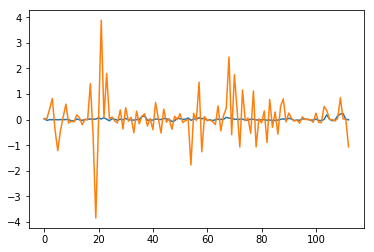

In [333]:
plt.plot(ecv.coef_)
plt.plot(lr.coef_)

0.379195509378


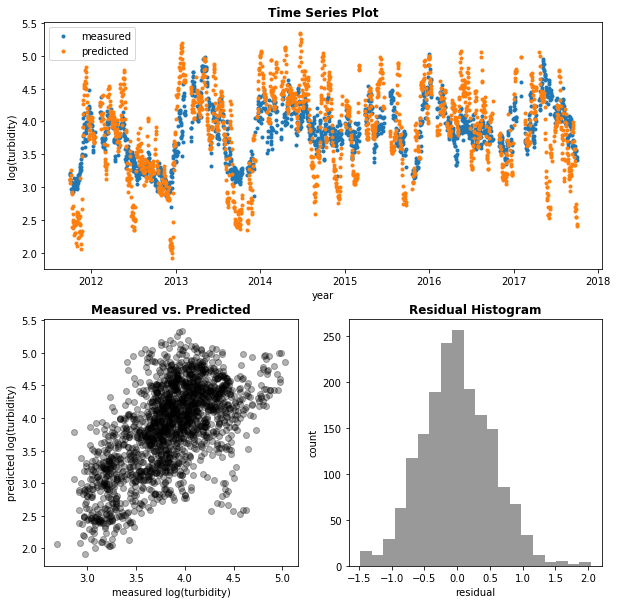

In [341]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFE

min_max_scaler = preprocessing.MinMaxScaler()

lr = LinearRegression()
data = df.dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)
# data = data-data.min()
# data = data/(data.max()-data.min())


X = data.drop(['turbidity'],axis=1)
y = data['turbidity']
# create the RFE model and select 10 attributes
rfe = RFE(lr, 13)
rfe = rfe.fit(X, y)
# # summarize the selection of the attributes
# print(rfe.support_)
# print(rfe.ranking_)

cols = X.columns[rfe.support_]
group = list(cols)
group.append('turbidity')
# sns.pairplot(df[[<insert the columns of your df here>]])
# sns.heatmap(df[group].corr())     #<---- will give you a good visualization of the correlation matrix

lr = LinearRegression()
data = df[group].dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)
data = data.dropna(axis=1)
# data = data-data.min()
# data = data/(data.max()-data.min())

X = data.drop(['turbidity'],axis=1)
y = data['turbidity']
lr.fit(X,y)
print(lr.score(X,y))
plotfit(X,y,lr)

In [268]:
Xsm = sm.add_constant(X)
# Create your model and
# Fit your model to your training set
smfit = sm.OLS(y,Xsm).fit()
smfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              turbidity   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     83.55
Date:                Wed, 31 Jan 2018   Prob (F-statistic):               0.00
Time:                        11:24:59   Log-Likelihood:                -530.66
No. Observations:                1438   AIC:                             1163.
Df Residuals:                    1387   BIC:                             1432.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.1680      3.652    -10.178      0.000     -44.332     -30.004
03110685       0.0406      0.555      0.073      0.942      -1.048       1.129
03110690       1.1547      0.751      1.538      0.124      -0.318       2.627
03111520      -1.7071      0.855     -1.996      0.046      -3.385      -0.030
03112500      -0.2511      0.867     -0.290      0.772      -1.951       1.449
03114275      -0.2119      1.002     -0.212      0.833      -2.177       1.754
03114280       0.6081      0.498      1.221      0.222      -0.369       1.585
03294600       0.2174      0.073      2.969      0.003       0.074       0.361
03381700      -0.1731      0.033     -5.224      0.000      -0.238      -0.108
03430250       1.1504      0.592      1.945      0.052      -0.010       2.311
03430320      -4.8296      3.657     -1.321      0.187     -12.004       2.344
03431091       0.2704      4.837      0.056      0.955      -9.219       9.760
03431712       4.0211      1.616      2.488      0.013       0.850       7.192
03594500       2.2753      0.420      5.420      0.000       1.452       3.099
04126740      -0.1341      0.073     -1.829      0.068      -0.278       0.010
05051500      -0.1633      0.062     -2.646      0.008      -0.284      -0.042
05051522       0.3648      0.104      3.507      0.000       0.161       0.569
05054000      -0.3018      0.088     -3.418      0.001      -0.475      -0.129
05064500       0.4285      0.068      6.284      0.000       0.295       0.562
05082500      -0.2495      0.056     -4.478      0.000      -0.359      -0.140
05207600       0.1803      0.047      3.824      0.000       0.088       0.273
05211000       0.1640      0.043      3.854      0.000       0.081       0.248
05270700      -0.5274      0.096     -5.466      0.000      -0.717      -0.338
05288500       0.6608      0.136      4.876      0.000       0.395       0.927
05331580      -0.1922      0.077     -2.506      0.012      -0.343      -0.042
05420500      -0.1363      0.061     -2.221      0.027      -0.257      -0.016
05558300       0.2073      0.029      7.051      0.000       0.150       0.265
05587060      -1.8596      0.204     -9.135      0.000      -2.259      -1.460
05587450       0.2200      0.064      3.455      0.001       0.095       0.345
06090300       1.3605      0.189      7.194      0.000       0.990       1.731
06090800      -1.0546      0.190     -5.553      0.000      -1.427      -0.682
06214500      -0.3886      0.064     -6.103      0.000      -0.514      -0.264
06295000       0.3528      0.084      4.215      0.000       0.189       0.517
06341000       0.8358      0.260      3.211      0.001       0.325       1.346
06342020       1.3801      0.395      3.497      0.000       0.606       2.154
06342500      -0.5207      0.097     -5.367      0.000      -0.711      -0.330
06

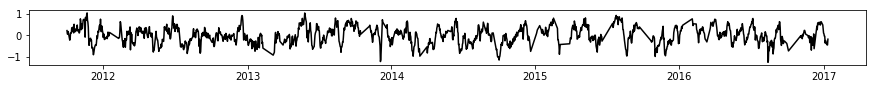

In [250]:
plt.figure(figsize=(15,1))
plt.plot(lr.predict(X)-y,'k-')

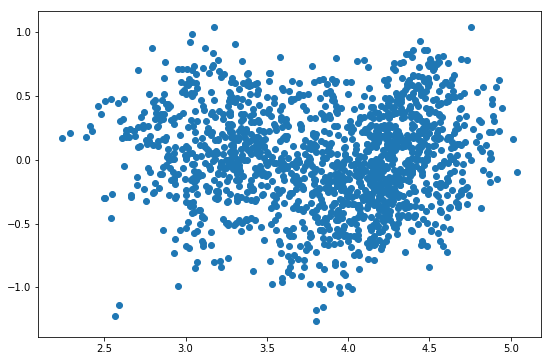

In [252]:
plt.figure(figsize=(9,6))
plt.scatter(lr.predict(X),lr.predict(X)-y)

In [266]:
X.corr()

,03110690,03111520,03430250,03430320,03431712,03594500,06090300,06090800,06342020,06441595,06813500,06818000,07022000,07374000,07020850
03110690,1.000000,0.993589,0.511620,0.510979,0.506100,0.246757,0.021670,0.020978,0.114671,-0.178067,-0.204988,-0.210439,0.036216,0.264759,0.047010
03111520,0.993589,1.000000,0.522241,0.520790,0.513495,0.247237,0.051344,0.052756,0.144035,-0.176223,-0.211069,-0.216692,0.029416,0.279115,0.041653
03430250,0.511620,0.522241,1.000000,0.993367,0.968445,0.485213,-0.111787,-0.127902,0.129716,-0.144907,-0.357352,-0.342165,0.077407,0.454342,0.087037
03430320,0.510979,0.520790,0.993367,1.000000,0.986355,0.494529,-0.112777,-0.128160,0.122563,-0.138699,-0.350192,-0.334895,0.075731,0.434212,0.084074
03431712,0.506100,0.513495,0.968445,0.986355,1.000000,0.497300,-0.110581,-0.125156,0.106082,-0.138953,-0.326571,-0.313724,0.075322,0.409988,0.085517
03594500,0.246757,0.247237,0.485213,0.494529,0.497300,1.000000,0.125559,0.105489,0.056793,-0.182823,-0.018271,0.008365,0.463099,0.541456,0.421373
06090300,0.021670,0.051344,-0.111787,-0.112777,-0.110581,0.125559,1.000000,0.979019,0.307048,-0.011070,0.347033,0.351550,0.345851,0.269895,0.368048
06090800,0.020978,0.052756,-0.127902,-0.128160,-0.125156,0.105489,0.979019,1.000000,0.331251,-0.003881,0.348935,0.353857,0.338881,0.255839,0.362639
06342020,0.114671,0.144035,0.129716,0.122563,0.106082,0.056793,0.307048,0.331251,1.000000,0.228865,-0.226775,-0.222726,-0.178713,0.048017,-0.157838
06441595,-0.178067,-0.176223,-0.144907,-0.138699,-0.138953,-0.182823,-0.011070,-0.003881,0.228865,1.000000,-0.025046,-0.040671,-0.289049,-0.380384,-0.285562


In [227]:
data.describe()

,03110690,03111520,03430250,03430320,03431712,03594500,05587060,06090300,06090800,06341000,...,06342500,06441595,06610000,06807000,06813500,06818000,07022000,07374000,07020850,turbidity
count,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,...,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000
mean,2.694255,2.707992,3.105060,3.196003,2.797279,4.055242,3.062847,8.645465,8.668588,2.326060,...,9.968055,3.057305,10.397290,10.605826,10.676504,10.728217,12.211446,13.014210,2.869504,3.843806
std,0.149804,0.168509,0.195797,0.151338,0.117209,0.041217,0.132099,0.296200,0.309645,0.127072,...,0.225234,0.020667,0.305769,0.314352,0.344746,0.366552,0.587588,0.532177,0.483963,0.692720
min,2.518503,2.503074,2.885917,3.022374,2.644755,3.989169,2.936513,7.709757,7.783224,2.079442,...,9.400961,2.984671,9.417355,9.655026,9.803667,9.820106,11.082143,11.856515,1.581038,1.916923
25%,2.583998,2.578701,2.945491,3.079499,2.714695,4.025709,2.980999,8.427268,8.431090,2.262804,...,9.846917,3.043093,10.288750,10.502324,10.529426,10.547970,11.744037,12.587073,2.557808,3.331310
50%,2.634762,2.646175,3.010621,3.117729,2.741485,4.049696,3.012098,8.602453,8.607034,2.309561,...,9.985068,3.054944,10.442901,10.596635,10.647803,10.714418,12.190959,13.102161,2.925309,3.943522
75%,2.755570,2.787477,3.268808,3.313003,2.863343,4.074652,3.088767,8.794825,8.852593,2.404239,...,10.102338,3.069447,10.566176,10.783632,10.893493,10.954309,12.648351,13.451667,3.235733,4.382808
max,3.360028,3.461037,3.654805,3.639427,3.216874,4.237579,3.604682,9.752665,9.729134,2.819592,...,10.515967,3.122365,11.475224,11.695247,11.703546,11.820410,13.845069,13.989464,3.887115,5.339939


0.673390714965


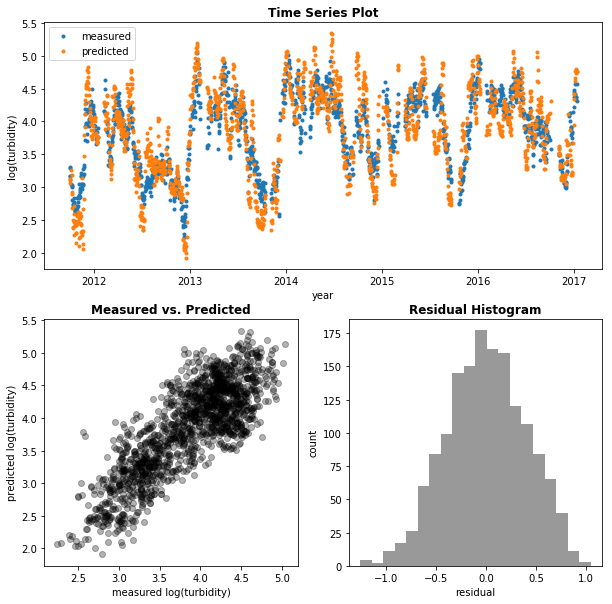

In [294]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFE

min_max_scaler = preprocessing.MinMaxScaler()

lr = LinearRegression()
data = df.dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)
# data = data-data.min()
# data = data/(data.max()-data.min())


X = data.drop(['turbidity'],axis=1)
y = data['turbidity']
# create the RFE model and select 10 attributes
rfe = RFE(lr, 20)
rfe = rfe.fit(X, y)
# # summarize the selection of the attributes
# print(rfe.support_)
# print(rfe.ranking_)

cols = X.columns[rfe.support_]
group = list(cols)
group.append('turbidity')
# sns.pairplot(df[[<insert the columns of your df here>]])
# sns.heatmap(df[group].corr())     #<---- will give you a good visualization of the correlation matrix

lr = LinearRegression()
data = df[group].dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)
data = data.dropna(axis=1)
# data = data-data.min()
# data = data/(data.max()-data.min())

X = data.drop(['turbidity'],axis=1)
y = data['turbidity']
lr.fit(X,y)
print(lr.score(X,y))
plotfit(X,y,lr)

In [295]:
# sns.heatmap(X.corr(),cmap='RdBu')
X.corr()

,03110690,03111520,03430250,03430320,03431712,03594500,05587060,06090300,06090800,06341000,06342020,06342500,06441595,06610000,06807000,06813500,06818000,07022000,07374000,07020850
03110690,1.000000,0.993601,0.514767,0.514918,0.511091,0.247349,0.084194,0.021286,0.020448,0.142754,0.113518,-0.056897,-0.179026,-0.291582,-0.215452,-0.205005,-0.210519,0.037068,0.265491,0.047731
03111520,0.993601,1.000000,0.525026,0.524343,0.518063,0.247602,0.081191,0.050899,0.052171,0.167483,0.142747,-0.028972,-0.177292,-0.297684,-0.219623,-0.210840,-0.216555,0.030283,0.279681,0.042407
03430250,0.514767,0.525026,1.000000,0.993410,0.968575,0.483377,0.176116,-0.113225,-0.129522,0.129762,0.120402,-0.124854,-0.150160,-0.452656,-0.389142,-0.353086,-0.338095,0.078553,0.454816,0.088263
03430320,0.514918,0.524343,0.993410,1.000000,0.986312,0.492609,0.178231,-0.114418,-0.129964,0.124024,0.113120,-0.118174,-0.144324,-0.442498,-0.382484,-0.345674,-0.330608,0.076467,0.434814,0.085000
03431712,0.511091,0.518063,0.968575,0.986312,1.000000,0.495251,0.166022,-0.112376,-0.127076,0.104765,0.096968,-0.122157,-0.144866,-0.419077,-0.357864,-0.321892,-0.309349,0.075284,0.410626,0.085871
03594500,0.247349,0.247602,0.483377,0.492609,0.495251,1.000000,0.551161,0.125225,0.104867,0.088587,0.054518,0.074257,-0.185326,-0.152899,-0.079039,-0.015743,0.010530,0.461886,0.539752,0.420004
05587060,0.084194,0.081191,0.176116,0.178231,0.166022,0.551161,1.000000,0.142497,0.150232,-0.096003,-0.096131,0.003664,-0.259875,0.029138,0.120381,0.207423,0.246933,0.755829,0.523756,0.674916
06090300,0.021286,0.050899,-0.113225,-0.114418,-0.112376,0.125225,0.142497,1.000000,0.979019,0.298582,0.307951,0.587836,-0.011297,0.292364,0.366097,0.348767,0.353043,0.347657,0.269838,0.369752
06090800,0.020448,0.052171,-0.129522,-0.129964,-0.127076,0.104867,0.150232,0.979019,1.000000,0.319114,0.332123,0.616249,-0.004087,0.299575,0.370624,0.350602,0.355265,0.340489,0.255509,0.364189
06341000,0.142754,0.167483,0.129762,0.124024,0.104765,0.088587,-0.096003,0.298582,0.319114,1.000000,0.909589,0.620763,0.253087,-0.230683,-0.232546,-0.245587,-0.238957,-0.182374,0.009165,-0.169369


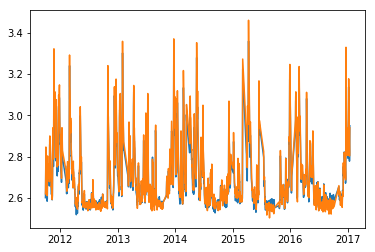

In [296]:
plt.plot(X['03110690'])
plt.plot(X['03111520'])


['03111520', '03430320', '03594500', '05587060', '06090300', '06342020', '06342500', '06441595', '06610000', '07022000', '07374000', 'turbidity']
0.58910967233


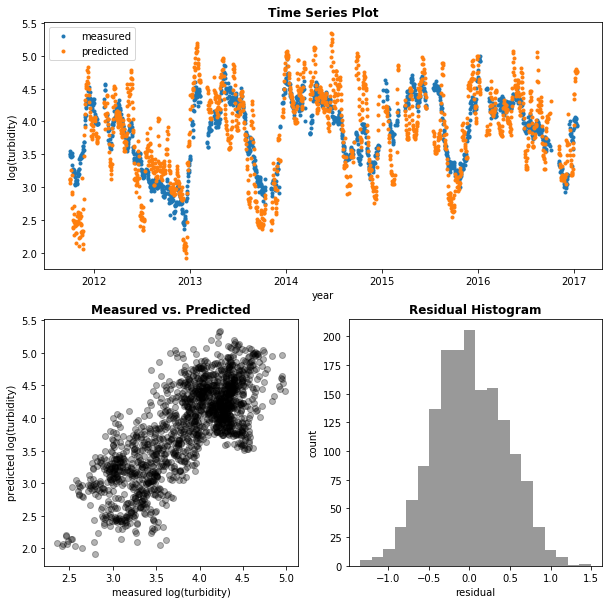

In [313]:
group = ['03111520', '03430320','03594500',
       '05587060', '06090300', '06342020', '06342500',
       '06441595', '06610000','07022000',
       '07374000', 'turbidity']
print(group)
lr = LinearRegression()
data = df[group].dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)
data = data.dropna(axis=1)
# data = data-data.min()
# data = data/(data.max()-data.min())

X = data.drop(['turbidity'],axis=1)
y = data['turbidity']
lr.fit(X,y)
print(lr.score(X,y))
plotfit(X,y,lr)

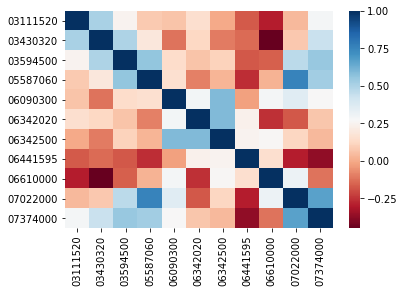

In [314]:
sns.heatmap(X.corr(),cmap='RdBu')

In [235]:
alphas = np.logspace(-10,3,num=14)
ecv = ElasticNetCV(cv=5, alphas=alphas,l1_ratio=0.5)
ecv.fit(X_train,y_train)
ecv.score(X_test,y_test)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.64257120128669021

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.623008002891


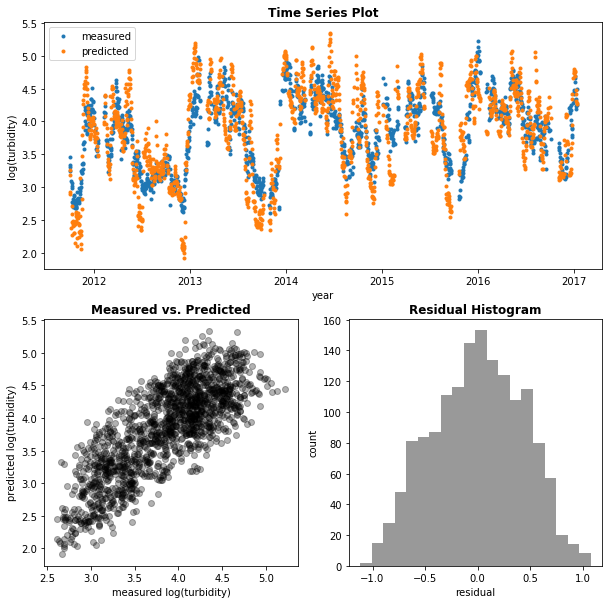

In [237]:

d_forecast = 7

from sklearn.feature_selection import RFE

lr = LinearRegression()
data = df.copy()
data['turbidity'] = data['turbidity'].shift(-d_forecast)
data = df.dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)

X = data.drop(['turbidity'],axis=1)
y = data['turbidity']
# create the RFE model and select 10 attributes
rfe = RFE(lr, 20)
rfe = rfe.fit(X, y)
# # summarize the selection of the attributes
# print(rfe.support_)
# print(rfe.ranking_)

cols = X.columns[rfe.support_]
group20 = list(cols)
group20.append('turbidity')
# sns.pairplot(df[[<insert the columns of your df here>]])
# sns.heatmap(df[group].corr())     #<---- will give you a good visualization of the correlation matrix

lr = LinearRegression()
data = df[group20]
data['turbidity'] = data['turbidity'].shift(-d_forecast)
data = data.dropna().apply(np.log)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(axis=1)

X = data.drop(['turbidity'],axis=1)
y = data['turbidity']
lr.fit(X,y)
print(lr.score(X,y))
plotfit(X,y,lr)